In [188]:
#im running this on the myenv kernel
import pandas as pd
data = pd.read_csv('web_ML_data.csv')
data.head(15)


,Title,URL,Description,Number of Words,Keywords
0,Machine Learning | An Introduction | by Gavin ...,https://towardsdatascience.com/machine-learnin...,Machine learning is a technique for turning in...,4291,"the, to, and, learning, is"
1,Understanding Machine Learning & Deep Learning...,https://dltlabs.medium.com/understanding-machi...,Machine Learning (ML) and Deep Learning (DL) a...,582,"in, labs, to, the, dlt"
2,A Beginner’s Guide to Machine Learning | by Ra...,https://medium.com/@randylaosat/a-beginners-gu...,Should I learn now… or later? Learning is a un...,2020,"the, to, data, of, learning"
3,What is Machine Learning? | IBM,https://www.ibm.com/topics/machine-learning,This introduction to machine learning provides...,3402,"the, and, to, learning, of"
4,What Is Machine Learning and Why Is It Important?,https://www.techtarget.com/searchenterpriseai/...,Machine learning (ML) is a type of artificial ...,3153,"the, learning, to, machine, data"
5,Medium,https://rsci.app.link/?%24canonical_url=https%...,NaN,14,"medium, this, see, needs, install"
6,Medium,https://medium.com/m/signin?operation=register...,NaN,1,NaN
7,Medium,https://medium.com/m/signin?operation=login&re...,NaN,1,NaN
8,Medium – Where good ideas find you.,https://medium.com/?source=---two_column_layou...,Medium is an open platform where readers find ...,528,"read, min, jun, the, to"
9,Medium,https://medium.com/m/signin?operation=register...,NaN,1,NaN


In [189]:
#check for null values
data.isnull().sum()

Title               19
URL                  0
Description        644
Number of Words      0
Keywords           146
dtype: int64

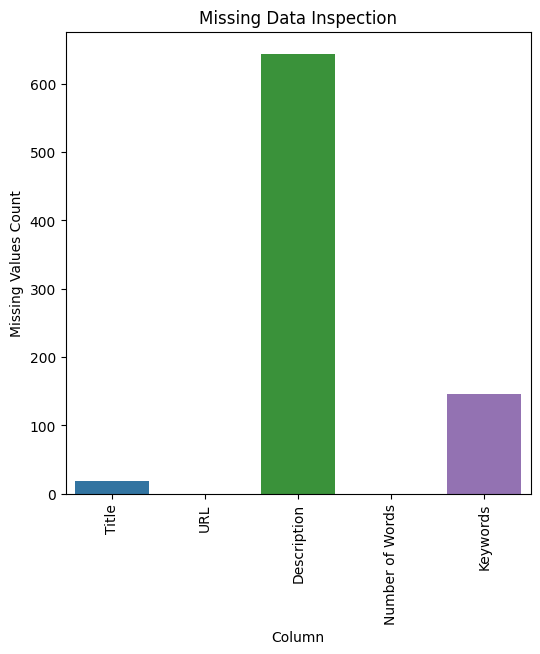

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_counts = data.isnull().sum()

plt.figure(figsize=(6, 6))
sns.barplot(x=missing_counts.index, y=missing_counts.values)
plt.xlabel('Column')
plt.ylabel('Missing Values Count')
plt.title('Missing Data Inspection')
plt.xticks(rotation=90)
plt.show()



In [191]:
#dropping titles that would result in a biased model.
data = data[data['Title'] != '403 Forbidden']
data = data[data['Title'] != 'Just a moment...']


In [192]:
import pandas as pd

# Convert 'Number of words' column to numeric values, setting invalid values to NaN
data['Number of Words'] = pd.to_numeric(data['Number of Words'], errors='coerce')

# Drop rows with non-numeric values in the 'Number of words' column
data = data.dropna(subset=['Number of Words'])

# Reset the index of the DataFrame after dropping rows
data = data.reset_index(drop=True)


In [193]:
# Calculate the most frequent value from non-missing entries
desired_text = data['Description'].dropna().mode().values[0]

# Replace missing values with the generated text
data['Description'].fillna(desired_text, inplace=True)



In [194]:
data.isnull().sum()

Title               19
URL                  0
Description          0
Number of Words      0
Keywords           146
dtype: int64

In [195]:
# Fill missing values in the "Keywords" column with a default keyword
data['Keywords'].fillna('unknown', inplace=True)


In [196]:
#checking the type of entries in the keywords column to determine how to split.
unique_entries = data['Keywords'].unique()

for entry in unique_entries:
    print(type(entry), entry)

<class 'str'> the, to, and, learning, is
<class 'str'> in, labs, to, the, dlt
<class 'str'> the, to, data, of, learning
<class 'str'> the, and, to, learning, of
<class 'str'> the, learning, to, machine, data
<class 'str'> medium, this, see, needs, install
<class 'str'> unknown
<class 'str'> read, min, jun, the, to
<class 'str'> sign, in, recent, up, searches
<class 'str'> in, sign, learning, machine, edwards
<class 'str'> the, to, and, data, in
<class 'str'> javascript, of, policy, is, supported
<class 'str'> the, to, artificial, intelligence, and
<class 'str'> the, learning, of, machine, in
<class 'str'> the, guide, to, beginners, read
<class 'str'> the, neural, networks, of, min
<class 'str'> to, programming, read, the, min
<class 'str'> the, you, to, license, and
<class 'str'> follow, in, engineer, sign, software
<class 'str'> data, to, read, min, in
<class 'str'> the, to, and, in, data
<class 'str'> the, and, in, read, min
<class 'str'> data, science, in, to, the
<class 'str'> data

In [197]:
#splitting the keywords column into a list of keywords
data = data.assign(Keywords=data['Keywords'].str.split(','))

In [198]:
# Create new columns for each of the keywords
keyword_columns = ['Keyword1', 'Keyword2', 'Keyword3', 'Keyword4', 'Keyword5']
for col in keyword_columns:
    data[col] = 'unknown'

# Iterate through the keywords column
for i, keyword_list in enumerate(data['Keywords']):
    # Check whether keyword_list is a list
    if isinstance(keyword_list, list):
        # Assign each element to the corresponding column
        for j, keyword in enumerate(keyword_list):
            if j < len(keyword_columns):
                data.loc[i, keyword_columns[j]] = keyword
    else:
        # Set all keyword columns to 'unknown' if the entry is not a list
        data.loc[i, keyword_columns] = 'unknown'

    



In [199]:
#drop the keywords column
data = data.drop('Keywords', axis=1)

In [200]:
#drop missing values from the title column to avoid errors on the next step
data = data.dropna(subset=['Title'])
data.isnull().sum()

Title              0
URL                0
Description        0
Number of Words    0
Keyword1           0
Keyword2           0
Keyword3           0
Keyword4           0
Keyword5           0
dtype: int64

In [201]:
import nltk

# Create a list to store the keyword_final values
keyword_final_values = []

# Iterate over each row
for i, row in data.iterrows():
    # Create a dictionary to store the correlations
    correlations = {}

    # Iterate over each keyword column
    for col in ['Keyword1', 'Keyword2', 'Keyword3', 'Keyword4', 'Keyword5']:
        # Get the keyword value
        keyword = row[col]
        
        # Skip empty or 'unknown' keywords
        if pd.isna(keyword) or keyword == 'unknown':
            continue
        
        # Calculate the correlation with URL, Description, and Title
        correlation = 0
        for col2 in ['URL', 'Description', 'Title']:
            string_values = row[col2]
            correlation += nltk.edit_distance(keyword, string_values)
        
        # Store the correlation in the dictionary
        correlations[keyword] = correlation
    
    # Find the keyword with the highest correlation
    if correlations:
        keyword_final = max(correlations, key=correlations.get)
    else:
        keyword_final = 'unknown'
    
    # Append the keyword_final value to the list
    keyword_final_values.append(keyword_final)

# Assign the list values to the 'keyword_final' column
data['keyword_final'] = keyword_final_values

# Drop the individual keyword columns
data.drop(['Keyword1', 'Keyword2', 'Keyword3', 'Keyword4', 'Keyword5'], axis=1, inplace=True)


In [204]:
data.isnull().sum()

Title              0
URL                0
Description        0
Number of Words    0
keyword_final      0
dtype: int64

In [205]:
data.to_csv('web_ML_data_cleaned.csv', index=False)